# In PROGRESS STILL
Need to tighten categories to the most interesting ones
# Overview
In this notebook we'll extend what we did in the last one focusing on area subreddits for Austin and the Bay Area. We're going to sample 100 users who interacted with BayArea specific subreddits and people who have interacted with the Austin subreddit.

In [104]:
import tqdm # Handy for showing progress on longer running jobs
import utils #Load the utilities we created in other notebooks
import analyze
from collections import defaultdict
from secret_services import *
import pandas as pd

In [73]:
subreddits=["bayarea","austin","nyc",]

In [105]:
#Code to get users and top domains
rows=[]
N=25
for subreddit in subreddits:
    print(subreddit)
    users=defaultdict(int)
    all_domains=defaultdict(int)
    for post in tqdm.tqdm(reddit.subreddit(subreddit).top("month", limit=N), total=N):
        comments=utils.traverse_post(post)
        if post.author:#can be null if deleted
            users[post.author.name]+=1
        for comment,level in comments:
            if comment.author:
                users[comment.author.name]+=1
        texts=[utils.get_post_text(post)]+[comment.body for comment,level in comments]
        for text in texts:
            domains=utils.extract_link_information(text)
            for k,v in domains.items():
                all_domains[k]+=v
    rows.append({
        "subreddit": subreddit,
        "all_domains": all_domains,
        "users": users,
    })
subreddit_df=pd.DataFrame(rows)
subreddit_df

bayarea


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [01:01<00:00,  2.47s/it]


austin


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [01:18<00:00,  3.12s/it]


nyc


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [06:59<00:00, 16.79s/it]


,subreddit,all_domains,users
0,bayarea,"{'www.reddit.com': 15, 'www.theguardian.com': ...","{'Evoslip': 3, 'CustomModBot': 3, 'lazinase': ..."
1,austin,"{'i.redd.it': 10, 'www.thetrace.org': 1, 'www....","{'antmbel': 1, 'Aware-Link': 3, 'moinatx': 8, ..."
2,nyc,"{'i.redd.it': 15, 'np.reddit.com': 30, 'www.re...","{'tellman1257': 9, 'meshflesh40': 2, 'Yannisli..."


# Sample Users and Get Other Subreddit Interactions 
Just like the last notebook

In [106]:
subreddit_df['user_count_in_posts']=subreddit_df['users'].apply(len)
subreddit_df

,subreddit,all_domains,users,user_count_in_posts
0,bayarea,"{'www.reddit.com': 15, 'www.theguardian.com': ...","{'Evoslip': 3, 'CustomModBot': 3, 'lazinase': ...",2265
1,austin,"{'i.redd.it': 10, 'www.thetrace.org': 1, 'www....","{'antmbel': 1, 'Aware-Link': 3, 'moinatx': 8, ...",2609
2,nyc,"{'i.redd.it': 15, 'np.reddit.com': 30, 'www.re...","{'tellman1257': 9, 'meshflesh40': 2, 'Yannisli...",3373


In [76]:
#Pretty similar counts: 1368 vs 1701

In [107]:
user_sample_size=1000
subreddit_df['user_sample']=subreddit_df['users'].apply(lambda x: [pd.Series(x.keys()).sample(user_sample_size)])
subreddit_df

,subreddit,all_domains,users,user_count_in_posts,user_sample
0,bayarea,"{'www.reddit.com': 15, 'www.theguardian.com': ...","{'Evoslip': 3, 'CustomModBot': 3, 'lazinase': ...",2265,"[[supershinythings, gourdo, casualwill, dboy99..."
1,austin,"{'i.redd.it': 10, 'www.thetrace.org': 1, 'www....","{'antmbel': 1, 'Aware-Link': 3, 'moinatx': 8, ...",2609,"[[kyree2, themostrad, Yaboymarvo, Gen_Ecks, Xi..."
2,nyc,"{'i.redd.it': 15, 'np.reddit.com': 30, 'www.re...","{'tellman1257': 9, 'meshflesh40': 2, 'Yannisli...",3373,"[[yurmomlemmeusername, backlikeclap, vanshnook..."


In [108]:
#Construct the user_df like before.
rows=[]
for idx,source_subreddit_row in subreddit_df.iterrows():
    for user in tqdm.tqdm(source_subreddit_row['user_sample'][0], total=user_sample_size):
        redditor=reddit.redditor(user)

        #NOTE These might be slow for redditors with big accounts, rather then make them a list, keeping them in "generator" form
        #  may be a good idea
        try:
            posts=[post for post in redditor.submissions.new()]
            comments=[comment for comment in redditor.comments.new()]
            for c in posts+comments:
                row={
                    'source_subreddit': source_subreddit_row['subreddit'],
                    "subreddit_name": c.subreddit.display_name,
                    "user": user
                }
                rows.append(row)
        except:
            print(user)
users_df=pd.DataFrame(rows)
users_df
    

  8%|████████████████▌                                                                                                                                                                                  | 85/1000 [02:48<22:08,  1.45s/it]

zyzygy99


 10%|███████████████████▊                                                                                                                                                                              | 102/1000 [03:22<19:27,  1.30s/it]

Powerful-Instance108


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                   | 654/1000 [21:46<09:24,  1.63s/it]

Abject-Temperat


 31%|███████████████████████████████████████████████████████████▉                                                                                                                                      | 309/1000 [10:18<17:20,  1.51s/it]

CheezeKona


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 889/1000 [29:37<02:33,  1.38s/it]

Slappyballs3rd


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [33:18<00:00,  2.00s/it]


,source_subreddit,subreddit_name,user
0,bayarea,ChurchOfCat,supershinythings
1,bayarea,TheCatTrapIsWorking,supershinythings
2,bayarea,IfIFitsISits,supershinythings
3,bayarea,hitmanimals,supershinythings
4,bayarea,Catloaf,supershinythings
...,...,...,...
405016,nyc,Cringetopia,Brandage0
405017,nyc,IdiotsInCars,Brandage0
405018,nyc,iamatotalpieceofshit,Brandage0
405019,nyc,iamatotalpieceofshit,Brandage0


In [129]:
#users_df.to_csv("users_df.csv",index=False)

In [109]:
rows=[]
for user, df in users_df.groupby("user"):
    redditor=reddit.redditor(user)
    row={"user": user,
            "comment_karma":redditor.comment_karma,
            "post_karma": redditor.awardee_karma,
            "total_karma": redditor.total_karma,
             "cake_day": pd.to_datetime(redditor.created_utc*1e9),
        }
    for subreddit,count in df.groupby('subreddit_name').count().iterrows():
        row[f'interacted_in-{subreddit}']=count['user']#count names columns a bit different
    rows.append(row)
user_profile=pd.DataFrame(rows)
user_profile

user  comment_karma  post_karma  total_karma  \
0                -Asher-          36955         597        40427   
1     -BrownSkinSamurai-            267          15          641   
2            -Cagafuego-          22277         286        22579   
3           -Natticakes-           3596         141         4092   
4                  -wnr-         135445         540       156644   
...                  ...            ...         ...          ...   
2987              zethuz           3297           0         3694   
2988             zgh5002         542000         674       563852   
2989             zherico          34149          64        38012   
2990         zorromaxima          66668        1268        72032   
2991             zvbxrpo           3501           7         9324   

                cake_day  interacted_in-A24  interacted_in-AsianMasculinity  \
0    2015-12-08 01:44:23                2.0                             1.0   
1    2020-09-24 23:42:16                NaN                             NaN   
2    2020-07-29 05:01:03                NaN                             NaN   
3    2021-04-27 04:42:21                NaN                             NaN   
4    2017-10-31 16:50:15                NaN                             NaN   
...                  ...                ...                             ...   
2987 2014-11-19 09:46:47                NaN                             NaN   
2988 2010-02-04 06:05:59                NaN                             NaN   
2989 2014-05-01 10:59:34                NaN                             NaN   
2990 2016-06-15 02:43:20                NaN                             NaN   
2991 2018-04-17 17:25:09                NaN                             NaN   

      interacted_in-AskFeminists  interacted_in-AskReddit  \
0                            1.0                     10.0   
1                            NaN                      5.0   
2                            NaN                      NaN   
3                            NaN                      1.0   
4                            NaN                      NaN   
...                          ...                      ...   
2987                         NaN                     16.0   
2988                         NaN                      NaN   
2989                         NaN                      NaN   
2990                         NaN                      NaN   
2991                         NaN                      3.0   

      interacted_in-AskScienceDiscussion  interacted_in-AskWomen  \
0                                    1.0                     1.0   
1                                    NaN                     NaN   
2                                    NaN                     NaN   
3                                    NaN                     NaN   
4                                    NaN                     NaN   
...                                  ...                     ...   
2987                                 NaN                     NaN   
2988                                 NaN                     NaN   
2989                                 NaN                     1.0   
2990                                 NaN                     NaN   
2991                                 NaN                     NaN   

      interacted_in-Blazblue  interacted_in-CODWarzone  interacted_in-COD_LFG  \
0                        1.0                       2.0                    1.0   
1                        NaN                       NaN                    NaN   
2                        NaN                       NaN                    NaN   
3                        NaN                       NaN                    NaN   
4                        NaN                       NaN                    NaN   
...                      ...                       ...                    ...   
2987                     NaN                       NaN                    NaN   
2988                     NaN                       NaN  

In [110]:
interacted_in_metrics=user_profile.filter(regex="interacted_in").describe().T#transpose so we can more easily query on count
interacted_in_metrics[interacted_in_metrics['count']>1].sort_values(by=["count","mean"],ascending=[False,False])

,count,mean,std,min,25%,50%,75%,max
interacted_in-AskReddit,1588.0,6.787154,9.387884,1.0,2.0,4.0,8.0,100.0
interacted_in-Austin,1003.0,19.000997,23.652360,1.0,4.0,10.0,23.0,152.0
interacted_in-bayarea,970.0,9.288660,13.707590,1.0,2.0,4.0,10.0,107.0
interacted_in-nyc,957.0,10.274817,15.079868,1.0,2.0,5.0,12.0,185.0
interacted_in-news,939.0,4.154420,6.589114,1.0,1.0,2.0,4.0,78.0
...,...,...,...,...,...,...,...,...
interacted_in-wanderlust,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
interacted_in-LegitCheck,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
interacted_in-AnAttemptWasMade,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
interacted_in-pinkplants,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


# Improve our categories

#TODO reduce categories to ones that are interesting
- Apple vs android
- guns
- politics (left, right leaning)
- anime
- gaming
- judgemental
- parenting vs children
- career
- sports
- average karma
- drugs
- 

In [137]:
interacted_in_metrics[interacted_in_metrics['count']>1].sort_values(by=["count"],ascending=False)

,count,mean,std,min,25%,50%,75%,max
interacted_in-AskReddit,1588.0,6.787154,9.387884,1.0,2.00,4.0,8.00,100.0
interacted_in-Austin,1003.0,19.000997,23.652360,1.0,4.00,10.0,23.00,152.0
interacted_in-bayarea,970.0,9.288660,13.707590,1.0,2.00,4.0,10.00,107.0
interacted_in-nyc,957.0,10.274817,15.079868,1.0,2.00,5.0,12.00,185.0
interacted_in-news,939.0,4.154420,6.589114,1.0,1.00,2.0,4.00,78.0
...,...,...,...,...,...,...,...,...
interacted_in-Google_Maps_Oddities,2.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
interacted_in-birdsofprey,2.0,1.500000,0.707107,1.0,1.25,1.5,1.75,2.0
interacted_in-squirrels,2.0,2.000000,1.414214,1.0,1.50,2.0,2.50,3.0
interacted_in-angelsbaseball,2.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


In [144]:

to_categorize=[x.replace("interacted_in-","") for x in interacted_in_metrics[interacted_in_metrics['count']>10].sort_values(by=["count"],ascending=False).index]
interest_mappings={
    
#     "not_relevant": [
#         'AskSF',
#         'California',
#         'LosAngeles',
#         'SJSU',
#         'Sacramento',
#         'SanJose',
#         'SanJoseFood',
#         'askaustin',
#         'bayarea',
#         'sanantonio',
#         'sandiego',
#         'sanfrancisco',
#         'texas',
#         'oakland',
#         "houston",
#         "Newbraunfels",
#  'Austin',
#     ],
    "gaming": ["ffxiv",
               "xboxone","games","pcgaming","modern_warfare","Destiny","cyberpunkgame","gaming","modern_warfare","GearsOfWar","BlackOps4"
              "GirlGamers","FortNiteBR","Cyberpunk","OverwatchUniversity","Competitiveoverwatch","Overwatch",
               "PS4","PS5","RocketLeague","battlestations","leagueoflegends","neoliberal","totalwar",
              ],
    "alcohol_free": ["stopdrinking"],
    "programming": ["Terraform","vuejs","programming"],
    "apple": ["ipad","iphone","apple","AppleWatch","MacOS","ios","macbookpro"],
    "android": ["pixel_phones","android","GooglePixel","Pixel2XL",],
    "childfree": ["Vasectomy","childfree",],
    "having_kids": ["Parenting","Preschoolers","beyondthebump","breastfeeding","MomForAMinute","Mommit","toddlers",
                   "daddit","toddlers",],
    
    "conservative": ["AdamCarolla",#could be good for age discrimination (YES THIS CODE IS FOR DISCRIMINATION?!?!?!?!!!!)
                    "Conservative", "conservatives",
                     "JoeRogan","ConservativeMemes","Libertarian","stupidpol",
                    ],
    "current_events": ["QAnonCasualties","TexasPolitics","CoronavirusCA",
                       "Coronavirus","politics","news",'California_Politics',"PoliticalDiscussion","FuckGregAbbott",
                      "CovIdiots",
                      ],
    
    "tech": ["google","technology","nvidia","excel","Amd","apple","cscareerquestions","talesfromtechsupport","learnpython","learnpython"
            "coding","sysadmin","techsupport","AWSCertifications",
             "linuxquestions","datascience","Ubiquiti","firefox","linux",
             "cybersecurity","AppleWatch","smarthome","ProgrammerHumor","Ring","coding",
            ],
    "dating": ["Marriage","Tinder",'DeadBedrooms','dating','relationship_advice',"coffeemeetsbagel","datingoverthirty",
              
              ],
    "lgbtq+": ["gaybrosgonemild","gay","xxfitness","asktransgender",
        "bisexual","gaybros","AreTheStraightsOK","AskGaybrosOver30","gay_irl","lgbt","AskGayMen","actuallesbians"],
    "sports": [
        "nba",
        "mlb",
        "nfl",
        "nhl",
        "MLS",
        "CollegeBasketball",
        "fantasyfootball",
        "soccer",
        "fantasybaseball",
        "sports",
    ],
    "edm":["EDM","electricdaisycarnival"],
    "liberal": ["VoteDEM","Persecutionfetish","JoeBiden",
        "SocialistRA","democrats","socialism","LateStageCapitalism","antiwork","Fuckthealtright","MurderedByAOC","ParlerWatch","liberalgunowners","neoliberal",],
    "fitness": ["Fitness"],
    "guns": ["guns","ar15","gundeals","austinguns","ak47","liberalgunowners"],
    "vegan/vegetarian": ["vegan","vegetarian","plantbaseddiet","veganmealprep","veganrecipes","veganrecipes"],#very different but for our purposes combining is OK
    "curlyhair": ["curlyhair"],
}
#so we can easily see what we haven't done yet
not_done_yet=set(to_categorize)-set([x for l in interest_mappings.values() for x in l ])
to_categorize[1500:]

['Rivian',
 'Zoom',
 'ArchitecturePorn',
 'Hasan_Piker',
 'CBD',
 'insomnia',
 'rawdenim',
 'KoreanFood',
 'RealTesla',
 'SafeMoon',
 'flicks',
 'ainbow',
 'AnalogCommunity',
 'RedditLaqueristas',
 'SalsaSnobs',
 'Enough_Sanders_Spam',
 'asktransgender',
 'NoContract',
 'toronto',
 'delusionalcraigslist',
 'blender',
 'Health',
 'yesyesyesno',
 'HomeMaintenance',
 'autism',
 'StonerEngineering',
 'KUWTK',
 'Mommit',
 'drones',
 'linux4noobs',
 'SEO',
 'Mattress',
 'bodybuilding',
 'cigars',
 'geopolitics',
 'pittsburgh',
 'diablo2',
 'sequence',
 'Paranormal',
 'YouOnLifetime',
 'AccidentalWesAnderson',
 'DAE',
 'buffalobills',
 'delta',
 'Albuquerque',
 'asklatinamerica',
 'raimimemes',
 'galaxys10',
 'anime_titties',
 'ToolBand',
 'nattyorjuice',
 'CrossStitch',
 'NintendoSwitchDeals',
 'pathofexile',
 'Volvo',
 'Toyota',
 'ShitMomGroupsSay',
 'TankPorn',
 'MrRobot',
 'GODZILLA',
 'reddeadredemption2',
 'madmen',
 'AdvancedRunning',
 'anime_irl',
 'PlayStationPlus',
 'IDontWorkHereLa

In [145]:
#WHEW, that's a lot of categories, lets sort them by total count

# Look at the major differences

In [146]:
#function to check if a a subreddit matches of list of subreddits
def check_interests(collection, matches, match_rule="ignore_case"):
    #match_rule exists in case you want to extend this to checking for common phrases used in comment or post body text.
    if match_rule=="ignore_case":
        count=len([c for c in collection if any(c.casefold()==m.casefold() for m in matches)])
    else:
        raise Exception("Unsupported match_rule")
    return count
#add concepts
rows=[]
for user, df in tqdm.tqdm(users_df.groupby("user")):
    redditor=reddit.redditor(user)
    row={"user": user,
            "comment_karma":redditor.comment_karma,
            "post_karma": redditor.awardee_karma,
            "total_karma": redditor.total_karma,
             "total_interactions": [len(df)],
             "cake_day": pd.to_datetime(redditor.created_utc*1e9),
        }
    for category, matches in interest_mappings.items():
        row["interest_in-"+category]=check_interests(df['subreddit_name'], matches)
#     for subreddit,count in df.groupby('subreddit_name').count().iterrows():
#         row[f'interacted_in-{subreddit}']=count['user']#count names columns a bit different
    rows.append(row)
user_profile=pd.DataFrame(rows).replace(0, pd.np.nan)
user_profile

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2992/2992 [43:48<00:00,  1.14it/s]
C:\Users\minim\AppData\Local\Temp/ipykernel_1636/423892185.py:25: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  user_profile=pd.DataFrame(rows).replace(0, pd.np.nan)


,user,comment_karma,post_karma,total_karma,total_interactions,cake_day,interest_in-gaming,interest_in-alcohol_free,interest_in-programming,interest_in-apple,interest_in-android,interest_in-childfree,interest_in-having_kids,interest_in-conservative,interest_in-current_events,interest_in-tech,interest_in-dating,interest_in-lgbtq+,interest_in-sports,interest_in-edm,interest_in-liberal,interest_in-fitness,interest_in-guns,interest_in-vegan/vegetarian,interest_in-curlyhair
0,-Asher-,36975.0,597.0,40449.0,[162],2015-12-08 01:44:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
1,-BrownSkinSamurai-,267.0,15.0,641.0,[120],2020-09-24 23:42:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-Cagafuego-,22277.0,286.0,22579.0,[100],2020-07-29 05:01:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN
3,-Natticakes-,3602.0,141.0,4098.0,[128],2021-04-27 04:42:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,-wnr-,135446.0,540.0,156645.0,[200],2017-10-31 16:50:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2987,zethuz,3298.0,NaN,3695.0,[161],2014-11-19 09:46:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2988,zgh5002,542004.0,674.0,563856.0,[200],2010-02-04 06:05:59,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN
2989,zherico,34149.0,64.0,38012.0,[187],2014-05-01 10:59:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2990,zorromaxima,66669.0,1268.0,72033.0,[176],2016-06-15 02:43:20,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
#user_profile.to_csv("user_profile.csv")

In [154]:
#user_profile=user_profile.filter(regex="interest_in")

In [159]:
clipped_user_profile=user_profile.filter(regex="-").clip(upper=1).fillna(0).join(user_profile['user'])
clipped_user_profile

,interest_in-gaming,interest_in-alcohol_free,interest_in-programming,interest_in-apple,interest_in-android,interest_in-childfree,interest_in-having_kids,interest_in-conservative,interest_in-current_events,interest_in-tech,interest_in-dating,interest_in-lgbtq+,interest_in-sports,interest_in-edm,interest_in-liberal,interest_in-fitness,interest_in-guns,interest_in-vegan/vegetarian,interest_in-curlyhair,user
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-Asher-
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-BrownSkinSamurai-
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-Cagafuego-
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-Natticakes-
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-wnr-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,zethuz
2988,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,zgh5002
2989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,zherico
2990,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,zorromaxima


In [164]:
users_df.merge(user_profile).groupby("source_subreddit")[['total_karma','post_karma','comment_karma']].median()

,total_karma,post_karma,comment_karma
source_subreddit,,,
austin,16010.0,155.0,12152.0
bayarea,19305.0,188.0,13851.0
nyc,22796.0,165.0,16288.0


In [161]:
interest_metrics=users_df.merge(clipped_user_profile, on=["user"])\
    .groupby("source_subreddit")\
    .mean().filter(regex="interest_in")
interest_metrics

,interest_in-gaming,interest_in-alcohol_free,interest_in-programming,interest_in-apple,interest_in-android,interest_in-childfree,interest_in-having_kids,interest_in-conservative,interest_in-current_events,interest_in-tech,interest_in-dating,interest_in-lgbtq+,interest_in-sports,interest_in-edm,interest_in-liberal,interest_in-fitness,interest_in-guns,interest_in-vegan/vegetarian,interest_in-curlyhair
source_subreddit,,,,,,,,,,,,,,,,,,,
austin,0.306301,0.016300,0.034882,0.078600,0.052084,0.015253,0.048110,0.089735,0.541890,0.296949,0.127499,0.054686,0.191833,0.002746,0.256986,0.031484,0.079147,0.015640,0.011916
bayarea,0.297148,0.011387,0.029531,0.110511,0.075014,0.011790,0.065297,0.082792,0.538641,0.353503,0.135195,0.065237,0.193892,0.011723,0.276468,0.032522,0.046333,0.018375,0.005295
nyc,0.316252,0.014754,0.023145,0.129808,0.054716,0.010591,0.041242,0.118189,0.544197,0.346946,0.140859,0.057700,0.239628,0.007665,0.272221,0.036259,0.027552,0.024439,0.008376


In [ ]:
pd.options.display.max_columns=999
interest_metrics

In [ ]:
correlations=clipped_user_profile.filter(regex="interest_in").corr()
correlations


<AxesSubplot:>

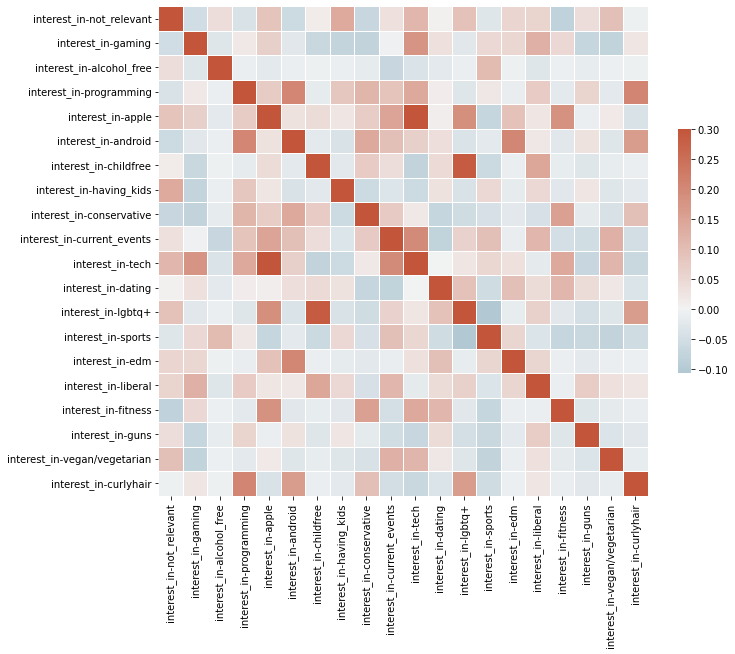

In [103]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

mask = np.triu(np.ones_like(correlations, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Further Work
Interacted in is a proxy for interest but may not always be so. Sometimes people post in different groups to understand things or to troll people. Political subreddits and vegan subreddits are good examples of where this can happen. As an improvement to this project you may want to classify interactions different based on whether they are positive or negatively upvoted. My hope is in this example the trolls are vastly outnumbered by the normal users.